## Кейс: Декомпозиции по Слуцкому и Хиксу и межвременной выбор
Напишем код, который будет считать эффекты дохода (ЭД) и замещения (ЭЗ) в двух типах декомпозиций, а также выводить расчеты, координаты точек и выводы о типах потребителя (чистый покупатель/чистый продавец, заемщик/кредитор)

1) Посмотрим на то, как выглядит функция Кобба-Дугласа и бюджетное ограничение

2) Напишем функцию для расчета декомпозиций в модели с начальным запасом

3) Напишем то же самое для межвременного выбора

In [6]:
library("ggplot2")  
library('repr') 
library("grid")
options(repr.plot.width=8, repr.plot.height=5)

15x1 + 6x2 <= 150
U = x1^2 * x2^3
x1 = m/((1+b/a)*p1) = 4
x2 = m/((1+a/b)*p2) = 15

[1]  4 15

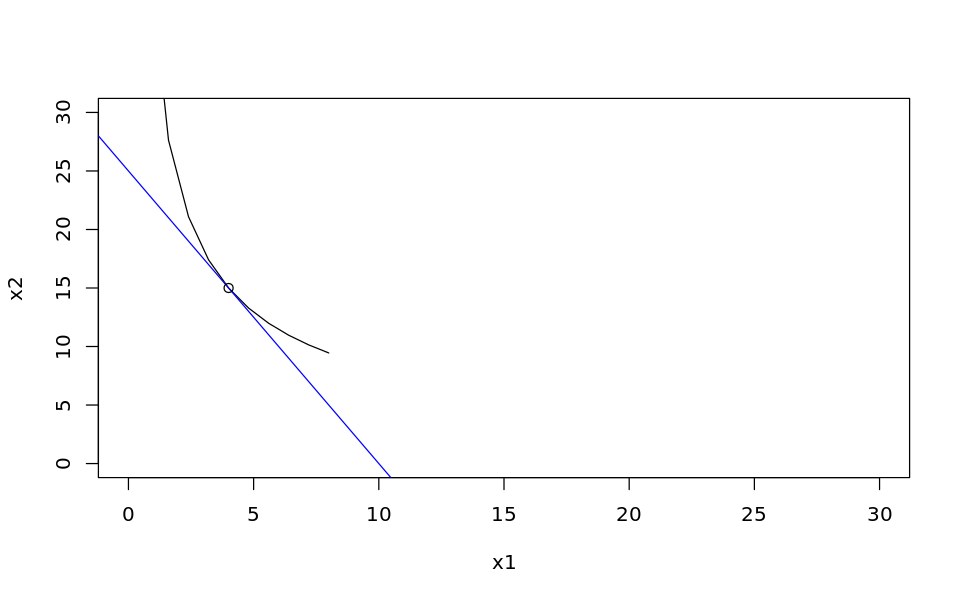

In [2]:
kd_demand <- function(m,a,b,p1,p2){ # функция спроса Кобба-Дугласа с бюджетным ограничением + график
  cat(p1,"x1 + ",p2,"x2 <= ",m, sep = "")
  cat("
","U = x1^",a," ","* x2^",b, sep = "")
  
  cat("
x1 = m/((1+b/a)*p1) = ",m/((1+b/a)*p1),"
","x2 = m/((1+a/b)*p2) = ",m/((1+a/b)*p2), sep = "")

U <- (m/((1+b/a)*p1))^a*(m/((1+a/b)*p2))^b
er <- m/((1+b/a)*p1)/5
x1 <- c(m/((1+b/a)*p1)-er*(5:1),m/((1+b/a)*p1),m/((1+b/a)*p1)+er*(1:5))
x2 <- (U*x1^(-a))^(1/b)
plot(xlim = c(0,max((m/p1+5),(m/p2+5))),ylim = c(0,max((m/p1+5),(m/p2+5))),y=x2,x=x1,type = "l")

abline(a=m/p2,b=(-p1/p2),col = "blue")
points(x=m/((1+b/a)*p1),y=m/((1+a/b)*p2))
return(c(m/((1+b/a)*p1),m/((1+a/b)*p2)))
}
kd_demand(150,2,3,15,6)


In [3]:
kd_demand_simple <- function(m,a,b,p1,p2){ # найдем выбор потребителя при заданной функции полезности и БО
  return(c(m/((1+b/a)*p1),m/((1+a/b)*p2)))
}

чистый покупатель товара 1
MRS = 0.5
4x1 + 8x2 <= 160
точка А: 32 4 

6x1 + 8x2 <= 224
MRS = 0.75
точка B: 29.86667 5.6 

6x1 + 8x2 <= 160
MRS = 0.75
точка C: 26.66667 5 

чистый покупатель товара 1
ЭЗ: xB-xA = -2.133333
ЭД: xС-xВ = -3.2

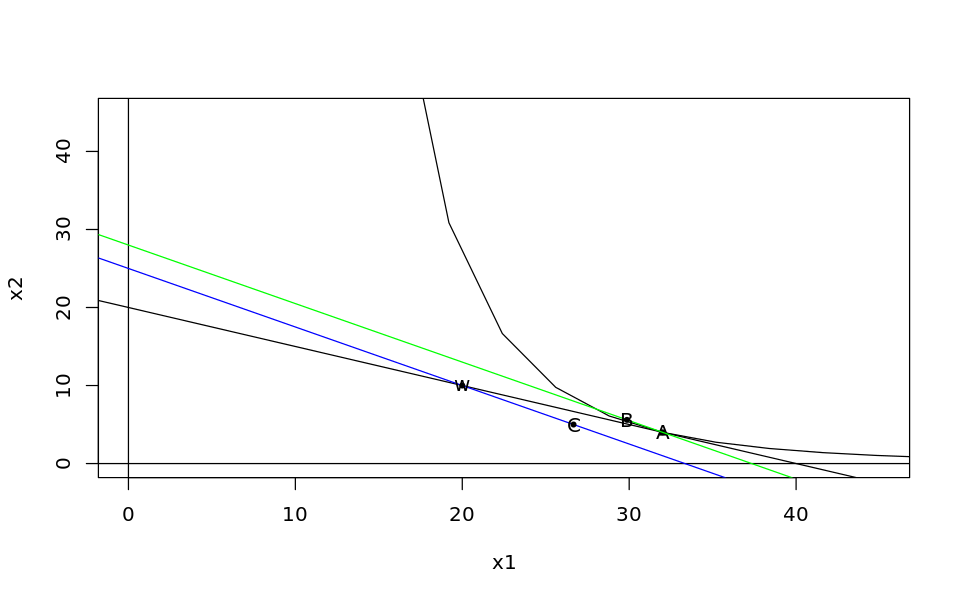

In [4]:
dekomposition <- function(type,stock,m,a,b,p1,p2,dp){ # функция для декомпозиций по Слуцкому и по Хиксу
  
##### Слуцкий #####  
  
  if(type=="s"){
    if(length(stock)==2){
      m <- p1*stock[1]+p2*stock[2]
      A <- kd_demand_simple(m,a,b,p1,p2)
      if(A[1]>stock[1]){
        cat("чистый покупатель товара 1
")
      }else if(A[1]<stock[1]){
        cat("чистый продавец товара 1
")
      }
      }
      if(length(stock)==2){
        m <- p1*stock[1]+p2*stock[2]
      }
      cat("MRS = ",p1/p2,"
",p1,"x1 + ",p2,"x2 <= ",m,"
", sep = "")
      A <- kd_demand_simple(m,a,b,p1,p2)
      cat("точка А:",A,"

")
      U <- (m/((1+b/a)*p1))^a*(m/((1+a/b)*p2))^b
      er <- m/((1+b/a)*p1)/10
      x1 <- c(m/((1+b/a)*p1)-er*(10:1),m/((1+b/a)*p1),m/((1+b/a)*p1)+er*(1:10))
      x2 <- (U*x1^(-a))^(1/b)
      
      plot(xlim = c(0,max((m/p1+5),(m/p2+5))),ylim = c(0,max((m/p1+5),(m/p2+5))),y=x2,x=x1,type = "l")
      abline(v=0)
      abline(h=0)
      abline(a=m/p2,b=(-p1/p2))
      points(x=A[1],y=A[2],pch=20,cex=0.8)
      text(x=A[1],y=A[2],"A")
      
      if(length(stock)==2){
        abline(a=((p1+dp)*stock[1]+p2*stock[2])/p2,b=-(p1+dp)/p2,col = "blue")
        points(x=stock[1],y=stock[2],pch=20,cex=0.8)
        text(x=stock[1],y=stock[2],"w")
      }else{
        abline(a=m/p2,b=-(p1+dp)/p2,col = "blue")
      }
      
      p1 <- p1+dp
      abline(a=(p1*A[1]+p2*A[2])/p2,b=(-p1/p2),col = "green")
      
      cat(p1,"x1 + ",p2,"x2 <= ",p1*A[1]+p2*A[2],"
MRS = ",p1/p2,"
", sep = "")
      B <- kd_demand_simple(p1*A[1]+p2*A[2],a,b,p1,p2)
      points(x=B[1],y=B[2],pch=20,cex=0.8)
      text(x=B[1],y=B[2],"B")
      cat("точка B:",B,"

")
      
      cat(p1,"x1 + ",p2,"x2 <= ",m,"
MRS = ",p1/p2,"
", sep = "")
      if(length(stock)==2){
        m <- p1*stock[1]+p2*stock[2]
      }
      C <- kd_demand_simple(m,a,b,p1,p2)
      points(x=C[1],y=C[2],pch=20,cex=0.8)
      text(x=C[1],y=C[2],"C")
      cat("точка C:",C,"

")
      if(C[1]>stock[1]){
        cat("чистый покупатель товара 1
")
      }else{
        cat("чистый продавец товара 1
")
      }
      
      cat("ЭЗ: xB-xA = ",B[1]-A[1],"
ЭД: xС-xВ = ",C[1]-B[1], sep = "")
      
      
##### Хикс #####     
      
      
  }else{
    if(length(stock)==2){
      A <- kd_demand_simple(m,a,b,p1,p2)
      if(A[1]>stock[1]){
        cat("чистый покупатель товара 1
")
      }else if(A[1]<stock[1]){
        cat("чистый продавец товара 1
")
      }
    }
    cat("MRS = ",p1/p2,"
",p1,"x1 + ",p2,"x2 <= ",m,"
", sep = "")
    if(length(stock)==2){
      m <- p1*stock[1]+p2*stock[2]
    }
    A <- kd_demand_simple(m,a,b,p1,p2)
    cat("точка А:",A,"

")
    U <- (m/((1+b/a)*p1))^a*(m/((1+a/b)*p2))^b
    er <- m/((1+b/a)*p1)/10
    x1 <- c(m/((1+b/a)*p1)-er*(10:1),m/((1+b/a)*p1),m/((1+b/a)*p1)+er*(1:10))
    x2 <- (U*x1^(-a))^(1/b)
    
    plot(xlim = c(0,max((m/p1+5),(m/p2+5))),ylim = c(0,max((m/p1+5),(m/p2+5))),y=x2,x=x1,type = "l")
    abline(v=0)
    abline(h=0)
    abline(a=m/p2,b=(-p1/p2))
    points(x=A[1],y=A[2],pch=20,cex=0.8)
    text(x=A[1],y=A[2],"A")
    
    p1 <- p1+dp
    cat("MRS = ",p1/p2,"
U = x1^a*x2^b = ",A[1]^a*A[2]^b,"
", sep = "")
    U <- A[1]^a*A[2]^b
    n <- (p1*b)/(p2*a)
    B <- c((U/n^b)^(1/(a+b)),(U/n^(-a))^(1/(a+b)))
    points(x=B[1],y=B[2],pch=20,cex=0.8)
    text(x=B[1],y=B[2],"B")
    cat("точка B:",B,"

")
    cat("MRS = ",p1/p2,"
",p1,"x1 + ",p2,"x2 <= ",m,"
", sep = "")
    if(length(stock)==2){
      m <- p1*stock[1]+p2*stock[2]
    }
    C <- kd_demand_simple(m,a,b,p1,p2)
    points(x=C[1],y=C[2],pch=20,cex=0.8)
    
    text(x=C[1],y=C[2],"C")
    er <- C[1]/10
    x1 <- c(C[1]-er*(10:1),C[1],C[1]+er*(1:10))
    U <- C[1]^a*C[2]^b
    x2 <- (U*x1^(-a))^(1/b)
    lines(x=x1,y=x2,type="l")
    
    if(length(stock)==2){
      points(x=stock[1],y=stock[2],pch=20,cex=0.8)
      text(x=stock[1],y=stock[2],"w")
      abline(a=(p1*stock[1]+p2*stock[2])/p2,b=-p1/p2,col = "blue")
    }else{
      abline(a=(m/p2),b=-(p1/p2),col = "blue")
    }
    cat("точка C:",C,"

")
    if(C[1]>stock[1]){
      cat("чистый покупатель товара 1
")
    }else{
      cat("чистый продавец товара 1
")
    }

cat("ЭЗ: xB-xA = ",B[1]-A[1],"
ЭД: xС-xВ = ",C[1]-B[1], sep = "")
}
}
dekomposition("s",c(20,10),0,4,1,4,8,2)

1.4C1 + C2 <= 34
U = C1^2 * C2^1

MRS = 1.4
1.4x1 + 1x2 <= 34
точка А: 16.19048 11.33333 
заемщик

1.7x1 + 1x2 <= 38.85714
MRS = 1.7
точка B: 15.2381 12.95238 

1.7x1 + 1x2 <= 34
MRS = 1.7
точка C: 14.5098 12.33333 
заемщик

ЭЗ: xB-xA =  -0.952381 
ЭД: xС-xВ =  -0.7282913

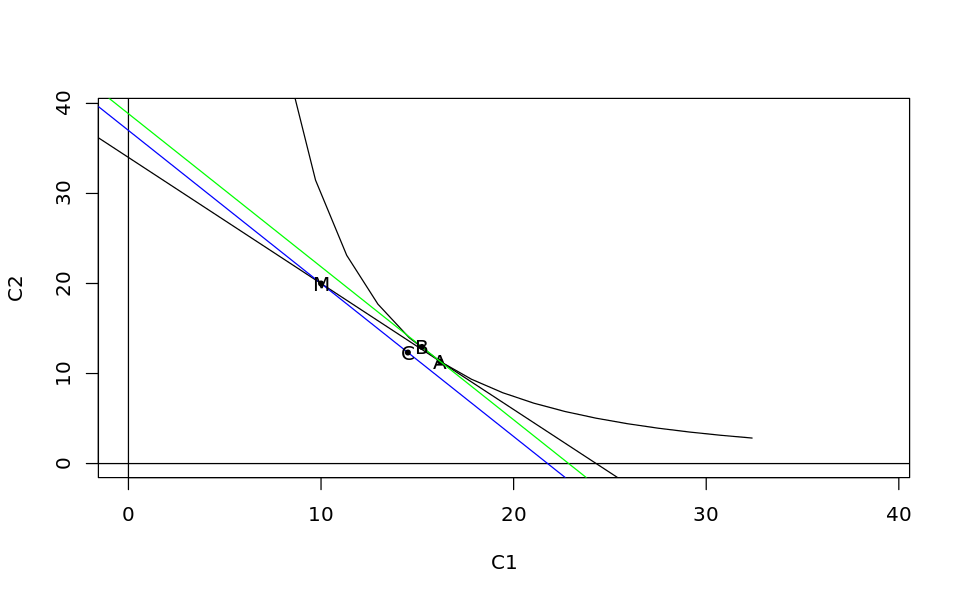

In [5]:
crosstime <- function(type,M,r,a,b,dr){ # межвременной выбор для 2-х периодов
  cat((1+r),"C1 + ","C2 <= ",M[1]*(1+r)+M[2], sep = "")
  cat("
","U = C1^",a," * C2^",b,"

", sep = "")
  m <- M[1]*(1+r)+M[2]
  p1 <- 1+r
  p2 <- 1
  
  if(type=="s"){
        A <- kd_demand_simple(m,a,b,p1,p2)
      cat("MRS = ",p1/p2,"
",p1,"x1 + ",p2,"x2 <= ",m,"
", sep = "")
      cat("точка А:",A,"
")
      if(A[1]>M[1]){
        cat("заемщик

")
      }else if(A[1]<M[1]){
        cat("кредитор

")
      }
      U <- (m/((1+b/a)*p1))^a*(m/((1+a/b)*p2))^b
      er <- m/((1+b/a)*p1)/10
      C1 <- c(m/((1+b/a)*p1)-er*(10:1),m/((1+b/a)*p1),m/((1+b/a)*p1)+er*(1:10))
      C2 <- (U*C1^(-a))^(1/b)
      
      plot(xlim = c(0,max((m/p1+5),(m/p2+5))),ylim = c(0,max((m/p1+5),(m/p2+5))),y=C2,x=C1,type = "l")
      abline(v=0)
      abline(h=0)
      abline(a=m/p2,b=(-p1/p2))
      points(x=A[1],y=A[2],pch=20,cex=0.8)
      text(x=A[1],y=A[2],"A")
      
      
        abline(a=((p1+dr)*M[1]+p2*M[2])/p2,b=-(p1+dr)/p2,col = "blue")
        points(x=M[1],y=M[2],pch=20,cex=0.8)
        text(x=M[1],y=M[2],"M")
      
      p1 <- p1+dr
      abline(a=(p1*A[1]+p2*A[2])/p2,b=(-p1/p2),col = "green")
      
      cat(p1,"x1 + ",p2,"x2 <= ",p1*A[1]+p2*A[2],"
MRS = ",p1/p2,"
", sep = "")
      B <- kd_demand_simple(p1*A[1]+p2*A[2],a,b,p1,p2)
      points(x=B[1],y=B[2],pch=20,cex=0.8)
      text(x=B[1],y=B[2],"B")
      cat("точка B:",B,"

")
      
      cat(p1,"x1 + ",p2,"x2 <= ",m,"
MRS = ",p1/p2,"
", sep = "")
      m <- p1*M[1]+p2*M[2]

      C <- kd_demand_simple(m,a,b,p1,p2)
      points(x=C[1],y=C[2],pch=20,cex=0.8)
      text(x=C[1],y=C[2],"C")
      cat("точка C:",C,"
")
      if(C[1]>M[1]){
        cat("заемщик

")
      }else{
        cat("кредитор

")
      }
      
      cat("ЭЗ: xB-xA = ",B[1]-A[1],"
ЭД: xС-xВ = ",C[1]-B[1])
  }else{
   
    A <- kd_demand_simple(m,a,b,p1,p2)
    cat("MRS = ",p1/p2,"
",p1,"x1 + ",p2,"x2 <= ",m,"
", sep = "")
    cat("точка А:",A,"
")
    A <- kd_demand_simple(m,a,b,p1,p2)
    if(A[1]>M[1]){
      cat("заемщик

")
    }else if(A[1]<stock[1]){
      cat("кредитор

")
    }
    U <- (m/((1+b/a)*p1))^a*(m/((1+a/b)*p2))^b
    er <- m/((1+b/a)*p1)/10
    C1 <- c(m/((1+b/a)*p1)-er*(10:1),m/((1+b/a)*p1),m/((1+b/a)*p1)+er*(1:10))
    C2 <- (U*C1^(-a))^(1/b)
    
    plot(xlim = c(0,max((m/p1+5),(m/p2+5))),ylim = c(0,max((m/p1+5),(m/p2+5))),y=C2,x=C1,type = "l")
    abline(v=0)
    abline(h=0)
    abline(a=m/p2,b=(-p1/p2))
    points(x=A[1],y=A[2],pch=20,cex=0.8)
    text(x=A[1],y=A[2],"A")
    
    p1 <- p1+dr
    cat("MRS = ",p1/p2,"
U = x1^a*x2^b = ",A[1]^a*A[2]^b,"
", sep = "")
    U <- A[1]^a*A[2]^b
    n <- (p1*b)/(p2*a)
    B <- c((U/n^b)^(1/(a+b)),(U/n^(-a))^(1/(a+b)))
    points(x=B[1],y=B[2],pch=20,cex=0.8)
    text(x=B[1],y=B[2],"B")
    cat("точка B:",B,"

")
    cat("MRS = ",p1/p2,"
",p1,"x1 + ",p2,"x2 <= ",m,"
", sep = "")
    
      m <- p1*M[1]+p2*M[2]
    
    C <- kd_demand_simple(m,a,b,p1,p2)
    points(x=C[1],y=C[2],pch=20,cex=0.8)
    
    text(x=C[1],y=C[2],"C")
    er <- C[1]/20
    x1 <- c(C[1]-er*(20:1),C[1],C[1]+er*(1:20))
    U <- C[1]^a*C[2]^b
    x2 <- (U*x1^(-a))^(1/b)
    lines(x=x1,y=x2,type="l")
    
    
      points(x=M[1],y=M[2],pch=20,cex=0.8)
      text(x=M[1],y=M[2],"M")
      abline(a=(p1*M[1]+p2*M[2])/p2,b=-p1/p2,col = "blue")
      
    cat("точка C:",C,"
")
    if(C[1]>M[1]){
      cat("заемщик

")
    }else{
      cat("кредитор

")
    }
    
    cat("ЭЗ: xB-xA =",B[1]-A[1],"
ЭД: xС-xВ =",C[1]-B[1])
  }
}
crosstime("s",c(10,20),0.4,2,1,0.3)
